# **Analyzing the Factors of getting a Stroke**

##### By: Alexander Khadra

### **Background information on strokes and how that relates to the project**

It is without a doubt that strokes have been a major medical concern for decades now. Every year, more than 795,000 people in the United States suffer from a stroke. About 610,000 of these are first or new strokes. What exactly is a stroke? A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications. Within this project we analyze a dataset that contain possible factors of a stroke and we see if we can accurately develop a way to detect what the main factors are for suffering a stroke. Indicating these factors can lead to the possibility of earlier treatment that lower the chance of brain damage and other complications.

**The following needs to be installed for later use**

In [60]:
pip install heatmapz

Note: you may need to restart the kernel to use updated packages.


**The following libraries are necessary for later analysis:**

In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from heatmap import heatmap, corrplot
import seaborn as sn
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)
from sklearn.model_selection import GridSearchCV

The main target of this project is to figure out which factors are the most correlated to having a stroke. We do so by downloading the following dataset from Kaggle. This dataset contains information on many people, some who suffered a stroke and some who did not. It also includes other factors that may relate to having a stroke or not.

In [62]:
stroke_data_all = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_data_all

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**The different variables (columns) in this data set are**

- `id:` Persons ID
- `gender:` Patients gender at birth
- `age:` Current age of Person
- `hypertension:` If person has hypertension (1 if person has hypertension and 0 if the person does not)
- `heart_disease:` If person has heart disease (1 if person has heart disease and 0 if the person does not)
- `ever_married:` If person has been married ("yes" if person has been married and "no" if the person has not)
- `work_type:` Whether it is private sector, self-employed, or government job
- `Residence_type:` Whether its Urban or Rural
- `avg_glucose_level:` Average glucose level for the person (measured in $mg/dL$)
- `bmi:` Average bmi level for each person (measured in $kg/m^2$)
- `smoking_status:` Whether a person is a smoker, formerly smoked, never smoked, or unknown

This project is split up into two parts. The first part is used to see how the quantitative data in our project are related to having a stroke or not. The second part focusses on the qualitative variables in our data set. The reason for splitting the project into a quantitative and qualitative section is because the way we measure relationship on quantitative and qualitative data differ, hence we need different procedures to measure the relationships.

**A brief  summary of our data set:**

In [63]:
stroke_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [64]:
stroke_data_all.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

### **Relationship for Quantitative Variables**

In this section we focus on quantitative variables and therefore we eliminate the qualitative variables from our data frame. From now on we focus the persons age, bmi level, and glucose level.

In [65]:
stroke_data = stroke_data_all.drop(columns = ['id', 
                                          'gender', 
                                          'hypertension', 
                                          'heart_disease', 
                                          'ever_married', 
                                          'work_type', 
                                          'Residence_type', 
                                          'smoking_status'], 
                               axis = 1)
stroke_data

,age,avg_glucose_level,bmi,stroke
0,67.0,228.69,36.6,1
1,61.0,202.21,NaN,1
2,80.0,105.92,32.5,1
3,49.0,171.23,34.4,1
4,79.0,174.12,24.0,1
...,...,...,...,...
5105,80.0,83.75,NaN,0
5106,81.0,125.20,40.0,0
5107,35.0,82.99,30.6,0
5108,51.0,166.29,25.6,0


Since we are trying to predict the "stroke" column in our data set, we turn that column from numeric values into categories where "stroke" represents a person who has suffered from a stroke and "no stroke" represents the person who has not suffer from a stroke. This makes the data easier to read and allows us to make our graphs more visually appealing. We can see the type of each column below.

In [66]:
stroke_data.replace({'stroke':{1:'stroke', 0:'no stroke'}},inplace=True)
stroke_data

,age,avg_glucose_level,bmi,stroke
0,67.0,228.69,36.6,stroke
1,61.0,202.21,NaN,stroke
2,80.0,105.92,32.5,stroke
3,49.0,171.23,34.4,stroke
4,79.0,174.12,24.0,stroke
...,...,...,...,...
5105,80.0,83.75,NaN,no stroke
5106,81.0,125.20,40.0,no stroke
5107,35.0,82.99,30.6,no stroke
5108,51.0,166.29,25.6,no stroke


**The types of each column are:**

In [67]:
stroke_data['stroke'] = stroke_data['stroke'].astype('category')
stroke_data.dtypes

age                   float64
avg_glucose_level     float64
bmi                   float64
stroke               category
dtype: object

Lets consider these relationships individually
- bmi vs. stroke 
- glucose level vs. stroke
- age vs. stroke


### bmi vs. stroke

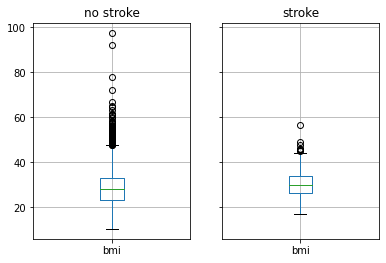

In [68]:
bmi_stroke_bp_data = stroke_data.drop(columns = ['avg_glucose_level', 
                                          'age'])


stroke_vs_bmi_plot = (
    bmi_stroke_bp_data
    .groupby("stroke")
    .boxplot()
)

From our graph above we see that there are far more outliers in our "no strokes case". This is most likely due to the amount of people suffering from stroke being far less than the amount of people that do not suffer from stroke. Thus, it is not surprising that there are more outliers in the non stroke boxplot. Our average bmi level was slightly higher for the "strokes" cases but it does not look like it is significant.

### glucose vs. stroke

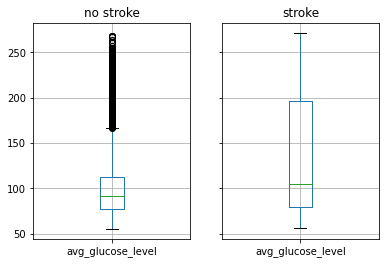

In [69]:
glucose_stroke_bp_data = stroke_data.drop(columns = ['bmi', 
                                          'age'])


stroke_vs_bmi_plot = (
    glucose_stroke_bp_data
    .groupby("stroke")
    .boxplot()
)

From the boxplot above we can see that the average glucose level has a higher average for people who have experienced a stroke. We can also see that the average glucose level for people who have experienced a stroke is highly skewed to the right. From this graph, there seems to be a correlation between glucose level and strokes. 

### age vs. storke

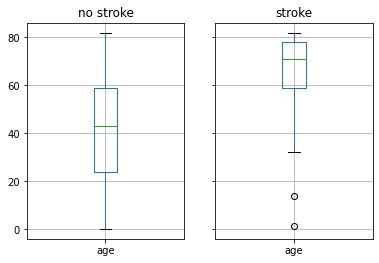

In [70]:
age_stroke_bp_data = stroke_data.drop(columns = ['avg_glucose_level', 
                                          'bmi'])


stroke_vs_bmi_plot = (
    age_stroke_bp_data
    .groupby("stroke")
    .boxplot()
)

The average age of people who suffer a stroke is far higher than the average age of people who do not suffer a stroke.  

From the three graphs above, we conclude that age and glucose level may be factors of a stroke while bmi is not. From this we can do the following chart.

### Using glucose level and age to determine a stroke 

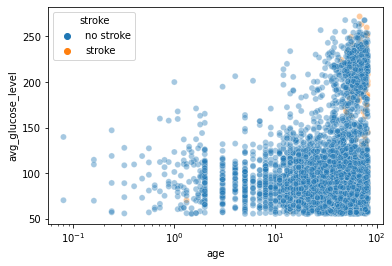

In [71]:
g = sn.scatterplot(x="age", 
                   y="avg_glucose_level",
                   hue = "stroke",
                   alpha = 0.4, 
                   data = stroke_data);
g.set(xscale="log");

From the graph above we can see that almost all points for strokes lie in the top right of our graph, meaning a high age and high glucose level tend to have a larger proportion of stroke cases. This is consistent to our previous graphs.

**Solving Classification Problem** <br>
For the sake of using our classifiers, we must have our values on whether someone has a stroke be numeric values. Although it is slightly harder to read the data, we must do so in order to work with the following algorithms. <br>
We split our data into a training and testing set. This allows us to perform functions on the training set and then see if our classifier is accurate by testing it on our testing set. We also scale our data that every variable has an average of 0. Doing this allows our classification problem to not be affected by the units of our variables. To learn more about splitting data see <br> https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [72]:
column_switch = {"stroke":     {"stroke": 1, "no stroke": 0}}

stroke_data_quantitative = stroke_data.drop(columns = ['bmi'])

stroke_data_quantitative = stroke_data_quantitative.replace(column_switch)
stroke_data_quantitative

X = stroke_data_quantitative.drop(["stroke"], axis = 1)
y = stroke_data_quantitative["stroke"]

# Scaling X
scaled_X = (X-X.mean())/ X.std()

X_train, X_test, y_train, y_test = model_selection.train_test_split(scaled_X, y, test_size=0.25, random_state = 40)

In [73]:
X_train.head()

,age,avg_glucose_level
4783,-1.513605,-0.884155
739,0.520655,-1.121989
623,1.360893,-0.834910
1165,-0.496475,-0.571238
1792,-0.850259,-0.752761


In [74]:
X_test.head()

,age,avg_glucose_level
118,-0.231137,-0.527072
3956,-0.319583,2.087564
266,-0.054245,-0.518459
3347,1.626231,0.940128
3736,1.228224,1.036410


In [75]:
print(f"y_train count is {y_train.count()}")
y_train.head()

y_train count is 3832


4783    0
739     0
623     0
1165    0
1792    0
Name: stroke, dtype: int64

In [76]:
print(f"y_test count is {y_test.count()}")
y_test.head()

y_test count is 1278


118     1
3956    0
266     0
3347    0
3736    0
Name: stroke, dtype: int64

<br>

#### **Using Logistic Regression**

In [77]:
logistic_model = linear_model.LogisticRegression(solver = "lbfgs")
logistic_model.fit(X_train, y_train)

lr_pred = logistic_model.predict(X_test)

# Training and testing accuracy
lr_train_acc = logistic_model.score(X_train, y_train)
lr_test_acc = logistic_model.score(X_test, y_test)

print("\033[1m Logistic regression accuracies: \033[0m")
print(f"Training accuracy: {lr_train_acc}")
print(f"Testing accuracy: {lr_test_acc}")
print("")

lm_con_mat = metrics.confusion_matrix(y_test, lr_pred)
print("\033[1m Confusion matrix for logistic regression: \033[0m")
print(lm_con_mat)
print("")

lr_report = metrics.classification_report(y_test, lr_pred)
print("\033[1m Logistic regression classification report: \033[0m")
print(lr_report)

 Logistic regression accuracies: 
Training accuracy: 0.9501565762004175
Testing accuracy: 0.9546165884194053

 Confusion matrix for logistic regression: 
[[1220    0]
 [  58    0]]

 Logistic regression classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1220
           1       0.00      0.00      0.00        58

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Using Decision Tree**

In [78]:
dt_model = DecisionTreeClassifier(max_depth = 25, max_leaf_nodes = 33)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_train_acc = dt_model.score(X_train, y_train)
dt_test_acc = dt_model.score(X_test, y_test)

print("\033[1m Decision tree accuracies: \033[0m")
print(f"Training accuracy: {dt_train_acc}")
print(f"Testing accuracy: {dt_test_acc}")
print("")

dt_con_mat = metrics.confusion_matrix(y_test, dt_pred)
print("\033[1m Confusion matrix for decision tree: \033[0m")
print(dt_con_mat)
print("")

dt_report = metrics.classification_report(y_test, dt_pred)
print("\033[1m Decision tree report: \033[0m")
print(dt_report)

 Decision tree accuracies: 
Training accuracy: 0.9561586638830898
Testing accuracy: 0.9460093896713615

 Confusion matrix for decision tree: 
[[1208   12]
 [  57    1]]

 Decision tree report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1220
           1       0.08      0.02      0.03        58

    accuracy                           0.95      1278
   macro avg       0.52      0.50      0.50      1278
weighted avg       0.92      0.95      0.93      1278



**Conclusion for Quantitative Varibales**

From our graphs we can see that age and glucose level had a correlation with having a stroke while bmi did not. Using logistics regression and decision tree to find the accuracy of using glucose and age as predictors on having a stroke yielded a 95% accuracy both times. This is fairly accurate but for something as severe as a stroke, you may want to be more accurate. This could be done by adding more factors or by choosing a different algorithm.

#### **Relationship for Qualitative Variables**

We now analyze the qualitative data, hence we get rid of all the quantitative variables as well as id since we already know there is no correlation with that variable.

In [79]:
stroke_data_2 = stroke_data_all.drop(columns = ['bmi', 
                                          'age', 
                                          'avg_glucose_level',
                                            'id'], 
                               axis = 1)
stroke_data_2

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,0
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,Male,0,0,Yes,Private,Rural,formerly smoked,0


We convert all the variables into numeric values in the following cell. This allows us to use a correlation table.

In [80]:
column_numbers = {"gender":     {"Male": 1, "Female": 0},
                "ever_married": {"Yes": 1, "No": 0 },
        "work_type": {"Private": 1, "Self-employed": 2, "Govt_job": 3, "children": 4},
        "Residence_type": {"Urban": 1, "Rural": 2},
        "smoking_status": {"smokes": 3, "formerly smoked": 2, "never smoked": 1, "Unknown": 0}}

stroke_data_2 = stroke_data_2.replace(column_numbers)
stroke_data_2

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,1,0,1,1,1,1,2,1
1,0,0,0,1,2,2,1,1
2,1,0,1,1,1,2,1,1
3,0,0,0,1,1,1,3,1
4,0,1,0,1,2,2,1,1
...,...,...,...,...,...,...,...,...
5105,0,1,0,1,1,1,1,0
5106,0,0,0,1,2,1,1,0
5107,0,0,0,1,2,2,1,0
5108,1,0,0,1,1,2,2,0


**Creating Correlation Table**

In [81]:
Correlation_Matrix = stroke_data_2.corr()
Correlation_Matrix

,hypertension,heart_disease,ever_married,Residence_type,smoking_status,stroke
hypertension,1.000000,0.108306,0.164243,0.007913,0.106639,0.127904
heart_disease,0.108306,1.000000,0.114644,-0.003092,0.085211,0.134914
ever_married,0.164243,0.114644,1.000000,-0.006261,0.284833,0.108340
Residence_type,0.007913,-0.003092,-0.006261,1.000000,-0.022853,-0.015458
smoking_status,0.106639,0.085211,0.284833,-0.022853,1.000000,0.054914
stroke,0.127904,0.134914,0.108340,-0.015458,0.054914,1.000000


**Plotting Correlation Table**

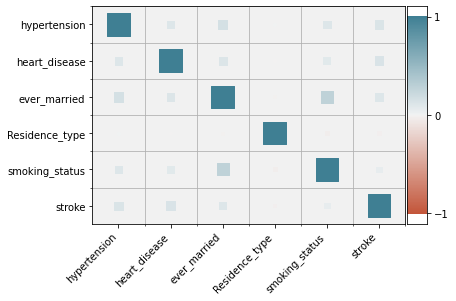

In [82]:
corrplot(Correlation_Matrix)

**Creating Heatmap**

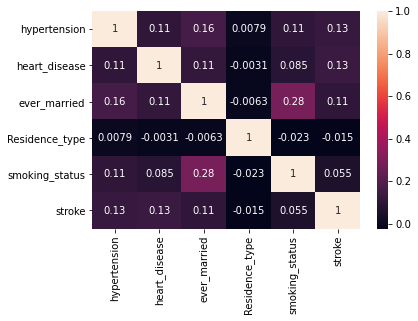

In [83]:
sn.heatmap(Correlation_Matrix, annot=True)
plt.show()

**To compare each variable individually with stroke, we create the following bar chart**

heart_disease
0     4.178734
1    17.028986
Name: Stroke_proportion, dtype: float64


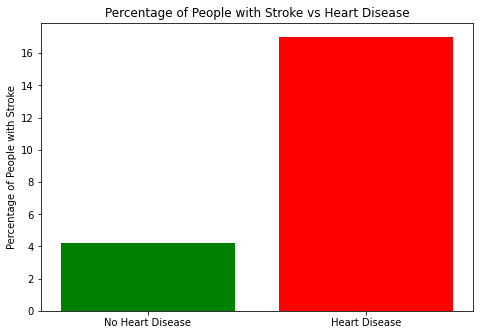

In [84]:
# This creates a new coolumn in our data set of all 1's to allow us to sum the total amount of people
stroke_data_all['count'] = pd.Series([1 for x in range(len(stroke_data_all.index))], index=stroke_data_all.index)

# This groups the data into people who had heart disease and those who didn't and sums the amount of people
total_people = (
    stroke_data_all
    .groupby("heart_disease")
    .sum("count") 
)

# Create new column for percentage of people with stroke
total_people["Stroke_proportion"] = total_people["stroke"] / total_people["count"] * 100

# find out the values we get
print(total_people["Stroke_proportion"])

#From the values we calculated above, create the x and y values
x_values = ["No Heart Disease", "Heart Disease"]
y_values = (4.178734, 17.028986)

#creating plot:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_values, y_values, color = ['green', 'red'])
ax.set_ylabel('Percentage of People with Stroke')
ax.set_title('Percentage of People with Stroke vs Heart Disease')
plt.show()

hypertension
0     3.967910
1    13.253012
Name: Stroke_proportion, dtype: float64


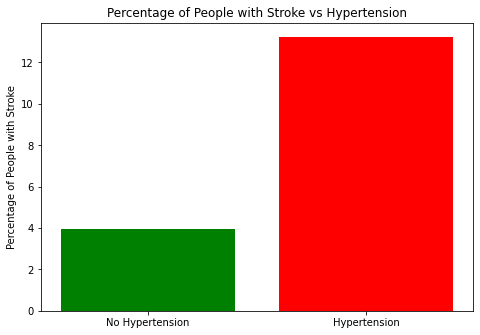

In [85]:
# This groups the data into people who had heart disease and those who didn't and sums the amount of people
total_people_hypertension = (
    stroke_data_all
    .groupby("hypertension")
    .sum("count") 
)

# Create new column for percentage of people with stroke
total_people_hypertension["Stroke_proportion"] = total_people_hypertension["stroke"] / total_people_hypertension["count"] * 100

# find out the values we get
print(total_people_hypertension["Stroke_proportion"])

#From the values we calculated above, create the x and y values
x_values = ["No Hypertension", "Hypertension"]
y_values = (3.967910, 13.253012)

#creating plot:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_values, y_values, color = ['green', 'red'])
ax.set_ylabel('Percentage of People with Stroke')
ax.set_title('Percentage of People with Stroke vs Hypertension')
plt.show()

ever_married
No     1.650541
Yes    6.561288
Name: Stroke_proportion, dtype: float64


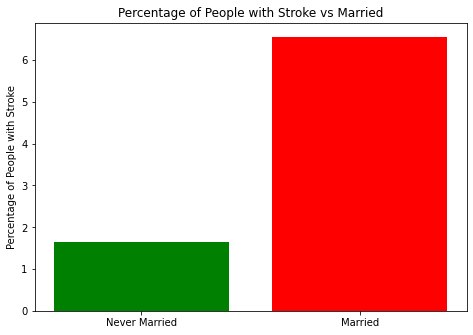

In [86]:
# This groups the data into people who had heart disease and those who didn't and sums the amount of people
total_people_ever_married = (
    stroke_data_all
    .groupby("ever_married")
    .sum("count") 
)

# Create new column for percentage of people with stroke
total_people_ever_married["Stroke_proportion"] = total_people_ever_married["stroke"] / total_people_ever_married["count"] * 100

# find out the values we get
print(total_people_ever_married["Stroke_proportion"])

#From the values we calculated above, create the x and y values
x_values = ["Never Married", "Married"]
y_values = (1.650541, 6.561288)

#creating plot:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_values, y_values, color = ['green', 'red'])
ax.set_ylabel('Percentage of People with Stroke')
ax.set_title('Percentage of People with Stroke vs Married')
plt.show()

Residence_type
Rural    4.534606
Urban    5.200308
Name: Stroke_proportion, dtype: float64


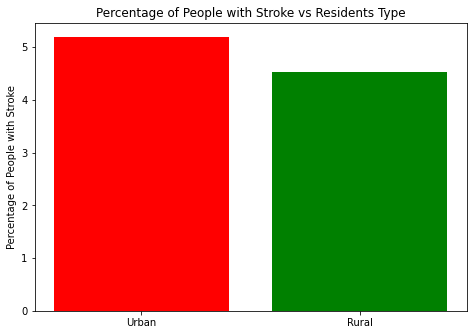

In [87]:
# This groups the data into people who had heart disease and those who didn't and sums the amount of people
total_people_residents = (
    stroke_data_all
    .groupby("Residence_type")
    .sum("count") 
)

# Create new column for percentage of people with stroke
total_people_residents["Stroke_proportion"] = total_people_residents["stroke"] / total_people_residents["count"] * 100

# find out the values we get
print(total_people_residents["Stroke_proportion"])

#From the values we calculated above, create the x and y values
x_values = ["Urban", "Rural"]
y_values = (5.200308, 4.534606)

#creating plot:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_values, y_values, color = ['red', 'green'])
ax.set_ylabel('Percentage of People with Stroke')
ax.set_title('Percentage of People with Stroke vs Residents Type')
plt.show()

smoking_status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: Stroke_proportion, dtype: float64


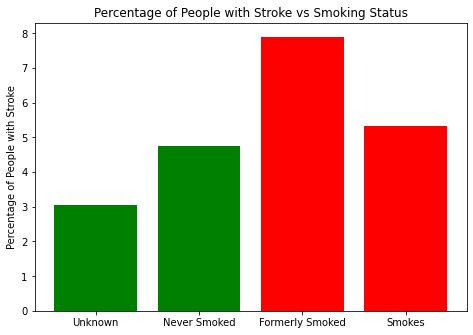

In [88]:
# This groups the data into people who had heart disease and those who didn't and sums the amount of people
total_people_smoking = (
    stroke_data_all
    .groupby("smoking_status")
    .sum("count") 
)

# Create new column for percentage of people with stroke
total_people_smoking["Stroke_proportion"] = total_people_smoking["stroke"] / total_people_smoking["count"] * 100

# find out the values we get
print(total_people_smoking["Stroke_proportion"])

#From the values we calculated above, create the x and y values
x_values = ["Unknown", "Never Smoked", "Formerly Smoked", "Smokes"]
y_values = (3.044041, 4.756871, 7.909605, 5.323194)

#creating plot:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_values, y_values, color = ['green', 'green', 'red', 'red'])
ax.set_ylabel('Percentage of People with Stroke')
ax.set_title('Percentage of People with Stroke vs Smoking Status')
plt.show()

**Conclusion for Quantitative Varibales**

From looking at the correlation table and heat map, we can tell right away that out of the qualitative variables, heart disease and hypertension has the greatest correlation. Surprisingly, there was also a slight correlation between marriage and stroke. 
<br>
<br>
The correlation however was small for all variables and we cannot conclude that heart disease or hypertension are significant factors. 